# MTH5001 Introduction to Computer Programming - Lecture 8
Module organisers Dr Lucas Lacasa and Prof. Thomas Prellberg

We will now turn towards doing Linear Algebra with Python. As this is such an essential part of mathematics, there are many Linear Algebra functions available in Python. You will find these functions in `scipy.linalg`, with the relevant data type `array` provided by `numpy`. So let us start with importing the relevant modules.

In [1]:
import numpy as np
import scipy.linalg as la

## Intermezzo: copying lists (and other composite data)

However, before we start dealing with matrices, we need to have a closer look at how Python stores data. Lets consider the following code, in which we have created a list A and assigned A to B.

In [2]:
A=[1,2,3,4]
B=A
print(A,B)

[1, 2, 3, 4] [1, 2, 3, 4]


Lets now modify A and B by changing some list entries.

In [3]:
A[0]=-1
B[3]=-4
print(A,B)

[-1, 2, 3, -4] [-1, 2, 3, -4]


You see that the change in A has affected B and the change in B has affected A. This is because A and B are actually the identical list: when B is created by the statement `B=A` Python does not actually copy the whole content of A and assigns that to B, but simply ensures that A and B refer to the **same place** in the computer memory. The function `id()` makes this visible - it returns a number representing the location of that memory.

In [4]:
print(id(A),id(B))

1405164410048 1405164410048


This is different from simple, non-composite data (i.e. data that is not a collection of other things, but single integers, floats, complex numbers, etc.), which does get copied over when you create a new variable. In this case, b remains unaffected when you change the content of a.

In [5]:
a=10.0
b=a
a=2
print(a,b)

2 10.0


Now a and b are stored in different places of the computer memory.

In [6]:
print(id(a),id(b))

140705357637440 1405145914896


The reason for this is efficiency. Most of the time when dealing with really large objects (such as a 1000x1000 matrix with a million entries) you want to avoid creating copies of whole chunks of memory.

### Equality versus object identity

The above is the reason why in the table of comparisons I showed you a few weeks ago there was an entry called object identity, comparing objects using 
```python 
a is b
```
If you have been thinking along, you may already be able to guess what the difference between `a is b` (identity) and `a==b` (equality) is.

Lets create two separate lists with equal entries:

In [7]:
C=[1,2,3]
D=[1,2,3]
print ('C is D:', C is D)
print ('C == D:', C==D)

C is D: False
C == D: True


This means that in this case, even though the content of C equals the content of D, C and D are actually different lists, in that they are stored in different places in the memory.

In [8]:
print(id(C),id(D))

1405164421568 1405139978048


Unfortunately there is an apparent anomaly when cosidering simple data types. Lets look again at the example above, but check for object identity.

In [9]:
a=10.0
b=a
print(a is b)
a=2
print(a is b)

True
False


This looks like some inconsistency, as I have just told you that a and b are stored in different locations of computer memory. I really need to be more precise: what is stored in computer memory is actually the value `10.0`, and a and b simply point to where this value is stored. Hence `a is b` is still true after the assignment `b=a` and becomes false once `a` is modified using `a=2`: Now the value `2` is stored elsewhere in the computer memory and a now points to where that value is stored.

Lets give another example of this.

In [10]:
x=997
print(id(x))
x+=1
print(id(x))
y=997
print(id(y))

1405163897584
1405163898032
1405163897808


The value 997 is stored at the address XYZ and `x` points to that address. When `x` is increased by 1, the value 998 is stored at the address PQR and `x` now points to that new address. Subsequently, when `y` is assigned the value 997, Python creates a new instance of the value 997 at yet another address UVW (Note: these addresses will be different for each of you, as this depends on the computer you use as well as any other programs you are running concurrently.) 

Finally, some often used values might be recycled, as the following example shows, where 997 has been replaced by 1.

In [11]:
x=1
print(id(x))
x+=1
print(id(x))
y=1
print(id(y))

140705357637408
140705357637440
140705357637408


Note that now `y` points to the same location as `x` did initially.

You don't really need to know all the intricate details of this section, but you need to be aware of it so you can avoid making mistakes such as trying to copy data by assignment. We'll deal with how to do this correctly in the next section.

### Creating copies of lists

Trying to copy lists (and other composite data) by assignment is a frequent programming mistake made by beginners. If you really want to create a true copy of data, and if 'B=A' does not work for that, what can you do?

There are actually a few ways you can help yourself. The "correct" way in Python 3 is to use the method `.copy()` for duplicating data.

In [12]:
A=[1,2]
B=A.copy()
print ('A is B:', A is B)
print ('A == B:', A==B)


A is B: False
A == B: True


There are two other ways you will sometimes see in written code. Slicing, for example, creates a copy, so slicing with `[:]` will work.

In [13]:
C=[1,2]
D=C[:]
print ('C is D:', C is D)
print ('C == D:', C==D)

C is D: False
C == D: True


And finally, using the function `list()` on a list also creates a copy.

In [14]:
C=[4,5]
D=list(C)
print ('C is D:', C is D)
print ('C == D:', C==D)

C is D: False
C == D: True


## Nested Lists, Arrays, Matrices, and All That

### Array data type

The module `numpy` provides the data type `ndarray` for $n$-dimensional arrays. In what follows, we will mainly consider two-dimensional arrays, i.e. matrices.

**A word of caution:** Python also knows a type `array` as part of the module `array`, and also a (deprecated) type `matrix` as part of the module `numpy`. Mixing data of these different types is a bad idea, and I *strongly* urge you to stay with the array type `ndarray` defined in `numpy`.

With the function `numpy.array` we can create an array from a range, tuple, or (nested) list.

In [15]:
l=[0,1,2,3,4,5]
a=np.array(l)
print(l)
print(a)

[0, 1, 2, 3, 4, 5]
[0 1 2 3 4 5]


You see that when printed out, this looks slightly differently than for lists. Let us repeat this for two-dimensional arrays, where the array is printed out like a matrix.

In [16]:
l=[[0,1,2],[3,4,5]]
a=np.array(l)
print(l)
print(a)

[[0, 1, 2], [3, 4, 5]]
[[0 1 2]
 [3 4 5]]


As usual, we can query the data type with `type()`.

In [17]:
type(a)

numpy.ndarray

While arrays look like nested lists, they have some more restrictive features when compared with nested lists, to enable faster access and computation. For example, numpy attempts to keep the data types homogeneous as in the next example, where the integer `2` got replaced by the floating point `2.`.

In [18]:
a_int=np.array([[0,1,2],[3,4,5]])
a_float=np.array([[0,1,2.],[3,4,5]])
print(a_int)
print(a_float)

[[0 1 2]
 [3 4 5]]
[[0. 1. 2.]
 [3. 4. 5.]]


We can query the *data* type of the array by using the `.dtype` attribute

In [19]:
a_int.dtype, a_float.dtype

(dtype('int32'), dtype('float64'))

Note that data types of array entries differ from standard Python data types, again mainly to make computations easier and faster to perform. You can find out more [here](https://docs.scipy.org/doc/numpy/user/basics.types.html).

### Creating Arrays

We have already created arrays by converting a (nested) list to an array by using the function `numpy.array()`. Early on in the lectures I already sneaked in a one-dimensional array when I used the function `numpy.linspace()`. You may recall I used it to create evenly spaced $x$-coordinates for plotting. What I really did was create an array with this function.

In [20]:
a=np.linspace(0,10,6)
print(a)
type(a)

[ 0.  2.  4.  6.  8. 10.]


numpy.ndarray

We can also create arrays pre-filled with zeros, ones, or any other value using `numpy.zeros()`, `numpy.ones()`, or `numpy.full()`, respectively.

In [21]:
a=np.zeros(4)
print(a)

[0. 0. 0. 0.]


In [22]:
a=np.zeros((3,5))
print(a)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [23]:
a=np.ones((5,3))
print(a)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [24]:
a=np.full((2,4),3)
print(a)

[[3 3 3 3]
 [3 3 3 3]]


Finally, we can create a square shaped array with ones on the diagonal (i.e. an identity matrix) using the function `numpy.eye()`.

In [25]:
a=np.eye(7)
print(a)

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


### Dimension, Shape, and Size

The attribute `.ndim` returns the dimension of an array, and the attribute `.shape` returns the tuple describing the number of rows, columns, etc., and the attribute `.size` returns the total number of entries

In [26]:
a=np.zeros(10)
print(a)
print(a.ndim,a.shape,a.size)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10,) 10


In [27]:
a=np.array([[1,2,3,4,5],[6,7,8,9,10]])
print(a)
print(a.ndim,a.shape,a.size)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
2 (2, 5) 10


In [28]:
a=np.full((3,2,4),np.exp(1))
print(a)
print(a.ndim,a.shape,a.size)

[[[2.71828183 2.71828183 2.71828183 2.71828183]
  [2.71828183 2.71828183 2.71828183 2.71828183]]

 [[2.71828183 2.71828183 2.71828183 2.71828183]
  [2.71828183 2.71828183 2.71828183 2.71828183]]

 [[2.71828183 2.71828183 2.71828183 2.71828183]
  [2.71828183 2.71828183 2.71828183 2.71828183]]]
3 (3, 2, 4) 24


### Slicing and Indexing

Indexing and slicing of arrays works just as for plain lists, including the use of negative indices. Numpy's indexing is however more versatile. For example, not only `a[i][j]`, but also `a[i,j]` is allowed.

In [29]:
a=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(a)
print(a[2,1])
print(a[2][1])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
8
8


Accessing rows is also just as with lists, and accessing columnns also works (as opposed to lists, where this concept does not make sense). We simply put placeholders `:` into the position of the index corresponding to the data that we want to extract.

In [30]:
a=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(a)
print(a[2])
print(a[2,:])
print(a[:,1])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[7 8 9]
[7 8 9]
[ 2  5  8 11]


Note that the last result is also given as a one-dimensional array, i.e. a row. If we want an array that resembles a column, we can use `numpy.reshape()`.

In [31]:
print(a[:,1])
print(np.reshape(a[:,1],(4,1)))

[ 2  5  8 11]
[[ 2]
 [ 5]
 [ 8]
 [11]]


The indexing extends to extracting a subarray (slicing).

In [32]:
a=np.reshape(np.array(range(100)),(5,20))
print(a)
print()
print(a[2:4,10:15])

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]]

[[50 51 52 53 54]
 [70 71 72 73 74]]


In the above I have used the `numpy.reshape()` function to change a linear array with $100$ entries to a square array of shape $5\times 20$. 

### Array Operations

Arithmetic operators on arrays apply **elementwise**. A new array is created and filled with the result.
In particular `*` multiplies elementwise (a process for matrices also known as the Hadamard product), which has nothing to do with a product of matrices.

In [33]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
b=np.eye(3)
c=np.ones((3,3))
print(a)
print(b)
print(c)
print('a+c')
print(a+b)
print('a*b')
print(a*b)
print('b/a')
print(b/a)
print('a**2')
print(a**2)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
a+c
[[ 2.  2.  3.]
 [ 4.  6.  6.]
 [ 7.  8. 10.]]
a*b
[[1. 0. 0.]
 [0. 5. 0.]
 [0. 0. 9.]]
b/a
[[1.         0.         0.        ]
 [0.         0.2        0.        ]
 [0.         0.         0.11111111]]
a**2
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]


There are many functions in `numpy` that work on arrays, such as `numpy.min` or `numpy.sum`. The nice thing is that we can also apply these commands along the rows or columns.

In [34]:
print(a)
print(np.sum(a))
print(np.sum(a,axis=0))
print(np.sum(a,axis=1))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
45
[12 15 18]
[ 6 15 24]


Note that the last result is also given as a one-dimensional array, i.e. a row. If we want an array that resembles a column, we can again use `numpy.reshape()`.

In [35]:
print(np.sum(a,axis=1))
print(np.reshape(np.sum(a,axis=1),(3,1)))

[ 6 15 24]
[[ 6]
 [15]
 [24]]


Note the difference between `np.sum` and `sum`: `np.sum` sums all the entries, `sum` sums up the columns.

In [36]:
print(np.sum(a))
print(sum(a))
print(np.sum(a,axis=0))

45
[12 15 18]
[12 15 18]


### Matrix Operations

I want to distinguish these, as these are no longer elementwise operations, but operate on the whole array by viewing it as a matrix. Matrix multiplication is done with the operator `@`.

In [37]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
b=np.array([[1,2],[3,4],[5,6]])
print(a)
print(b)
print(a@b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2]
 [3 4]
 [5 6]]
[[ 22  28]
 [ 49  64]
 [ 76 100]]


Python actually allows you a bit of flexibility, as it interprets a one-dimensional arrays as column or vectors when doing matrix multiplication, as needed from the context. So be careful.

In [38]:
a=np.array([[1,2],[2,3],[3,4]])
b=np.array([-1,2])
c=np.array([3,1,1])
print('a:',a)
print('b:',b)
print('c:',c)
print()
print('a@b:',a@b)
print('c@a:',c@a)
# print(b@c) # does not work, size mismatch

a: [[1 2]
 [2 3]
 [3 4]]
b: [-1  2]
c: [3 1 1]

a@b: [3 4 5]
c@a: [ 8 13]


Powers of matrices are computed via `numpy.linalg.matrix_power()`, there is no symbolic operator like `**`. 

In [39]:
a=np.array([[1,2],[2,3]])
from numpy.linalg import matrix_power as mpow
print(mpow(a,3))

[[21 34]
 [34 55]]


(Note that this function is in `numpy.linalg` as opposed to `scipy.linalg`. For the difference between these two versions of linalg see https://docs.scipy.org/doc/scipy/reference/linalg.html.)

The transpose of a matrix can be computed by appending to it `.T`

In [40]:
print(a.T)

[[1 2]
 [2 3]]


In [41]:
a=np.array([[1,2],[3,4]])
print(a)

[[1 2]
 [3 4]]


The inverse of a matrix can be computed using `scipy.linalg.inv` (or using `numpy.linalg.matrix_power()`, introduced above, with exponent $-1$).

In [42]:
a=np.array([[1,2],[3,4]])
print(a)
print(la.inv(a))

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]


## Solving Linear Systems

We are now in a position to solve linear systems such as $$Ax=b.$$ 
If the matrix $A$ is invertible, we could simply compute $x=A^{-1}b$. Let us look at a randomly chosen example.

In [43]:
A=np.random.normal(size=(4,4))
b=np.random.normal(size=(4,1))
print('A=',A)
print('b=',b)

A= [[ 1.11050523  1.02720735  1.44468845  0.4005472 ]
 [-0.2050765  -0.42704018  0.54623482 -0.86418437]
 [-0.30467611  0.77858748  0.67821877 -0.53731029]
 [-1.54731068  0.18668606  0.08042919 -0.51886406]]
b= [[0.981697  ]
 [1.10459688]
 [0.98681622]
 [0.64966489]]


Is A invertible? Let us check by computing the determinant.

In [44]:
print(la.det(A))

-1.3311671701454495


Let us solve for $x$.

In [45]:
Ainv=la.inv(A)
x_soln=Ainv@b
print(x_soln)

[[-0.19646231]
 [-0.08243479]
 [ 1.03749837]
 [-0.53505524]]


Let us check this answer by computing $Ax-b$. The answer should be (close to) zero.

In [46]:
print(A@x_soln-b)

[[ 5.55111512e-16]
 [-2.22044605e-16]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]


Instead of computing `scipy.linalg.inv(A)@b`, there is a better (i.e. faster and numerically more reliable) way to do this by using the provided command `scipy.linalg.solve(A,b)`.

In [47]:
x_soln2=la.solve(A,b)
print(x_soln2)

[[-0.19646231]
 [-0.08243479]
 [ 1.03749837]
 [-0.53505524]]


The computation is done slightly differently, but the two solutions are numerically the same.

In [48]:
print(x_soln2-x_soln)

[[ 1.66533454e-16]
 [-1.38777878e-17]
 [-2.22044605e-16]
 [-3.33066907e-16]]


Let us try to repeat this with "slightly" larger matrices.

In [49]:
A=np.random.normal(size=(1000,1000))
b=np.random.normal(size=(1000,1))
x_soln=la.inv(A)@b
x_soln2=la.solve(A,b)

How good are the two results?

In [50]:
print(np.max(np.abs(A@x_soln-b)))
print(np.max(np.abs(A@x_soln2-b)))

5.274003456179344e-12
1.0449419107771973e-12


So how long does each computation take? We can use `%%timeit` to find out.

In [51]:
%%timeit
x_soln=la.inv(A)@b

30.2 ms ± 278 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [52]:
%%timeit
x_soln2=la.solve(A,b)

21.2 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Solving with `scipy.linalg.solve` is more accurate and about twice as fast.

## Eigenvalues and Eigenvectors

Computation of Eigenvalues and Eigenvectors is also simply done. The function `scipy.linalg.eig(A)` returns a tuple `(eigenvalues,eigenvectors)` containing a one-dimensional array of Eigenvalues and a two-dimensional array of associated Eigenvectors. Eigenvalues are given as complex numbers, as Eigenvalues are generally complex valued for a general matrix.

Let us first look at a symmetric $2\times2$ matrix, which has only real Eigenvalues.

In [53]:
A=np.array([[1,2],[0,-3]])
print(A)

[[ 1  2]
 [ 0 -3]]


In [54]:
eval_A,evec_A=la.eig(A)
print(eval_A)
print()
print(evec_A)

[ 1.+0.j -3.+0.j]

[[ 1.         -0.4472136 ]
 [ 0.          0.89442719]]


Let us test the result. Every eigenvector $v$  has to satisfy $Av=\lambda v$ with the associated eigenvalue $\lambda$. First we check whether $|A-\lambda I|=0$ for all eigenvalues.

In [55]:
print(la.det(A-eval_A[0]*np.eye(2)))
print(la.det(A-eval_A[1]*np.eye(2)))

0j
0j


Next, we test whether the Eigenvectors have been computed correctly.

In [56]:
print((A-eval_A[0]*np.eye(2))@evec_A[:,0])
print((A-eval_A[1]*np.eye(2))@evec_A[:,1])

[0.+0.j 0.+0.j]
[0.+0.j 0.+0.j]


This seems all fine. Let us try a non-symmetric $3\times3$ matrix.

In [57]:
A=np.random.normal(size=(3,3))
#A=(A+A.T)/2
print(A)

[[ 0.91365479  0.6253193  -0.62979077]
 [-2.07297439  2.46969275  1.02902531]
 [ 1.66509772  1.04214407 -0.49151424]]


Now the Eigenvalues are complex valued

In [58]:
eval_A,evec_A=la.eig(A)
print(eval_A)
print()
print(evec_A)

[0.18950071+0.93688165j 0.18950071-0.93688165j 2.5128319 +0.j        ]

[[ 0.40104776+0.31143531j  0.40104776-0.31143531j  0.18622038+0.j        ]
 [-0.10446941+0.24020869j -0.10446941-0.24020869j  0.89170954+0.j        ]
 [ 0.82070376+0.j          0.82070376-0.j          0.41252402+0.j        ]]


In [59]:
print((A-eval_A[0]*np.eye(3))@evec_A[:,0])
print((A-eval_A[1]*np.eye(3))@evec_A[:,1])
print((A-eval_A[2]*np.eye(3))@evec_A[:,2])

[-2.22044605e-16-2.49800181e-16j  3.33066907e-16-1.11022302e-16j
  8.88178420e-16+5.55111512e-16j]
[-2.22044605e-16+2.49800181e-16j  3.33066907e-16+1.11022302e-16j
  8.88178420e-16-5.55111512e-16j]
[-8.88178420e-16+0.j -6.10622664e-16+0.j  4.44089210e-16+0.j]


Again, our checks have been successful.

## Eigenvalue statistics of large matrices

I now want to present a numerical experiment involving the computation of Eigenvalues for a large matrix. Consider a real-valued symmetric matrix with entries randomly chosen, constructed as below.

In [60]:
A=np.random.normal(size=(5,5))
A=(A+A.T)/2
print(A)

[[ 1.88520577  1.73099513  0.40908917  0.6408741  -0.17587777]
 [ 1.73099513 -0.76050576 -1.29380247 -0.39098819 -0.44410793]
 [ 0.40908917 -1.29380247  1.23719999 -0.20504732 -0.1930293 ]
 [ 0.6408741  -0.39098819 -0.20504732 -0.38483163 -0.07382914]
 [-0.17587777 -0.44410793 -0.1930293  -0.07382914 -0.07766563]]


The eigenvalues are real, as the matrix is symmetric. They are given as complex numbers, hence we extract the real part.

In [61]:
print(np.real(la.eig(A)[0]))

[-2.42981173  2.86730468  1.74612331 -0.01826455 -0.26594896]


I want us to look at the eigenvalues for a really large matrix of dimension $1000$.

In [62]:
A=np.random.normal(size=(1000,1000))
A=(A+A.T)/2
print(A)

[[ 0.3723547  -1.50869411  0.33270585 ... -0.84082405 -0.37480482
   0.12761956]
 [-1.50869411  0.47015307  0.39968033 ... -0.71852756 -0.24282684
   0.19560015]
 [ 0.33270585  0.39968033  1.53630633 ... -0.58017841 -0.42643223
   0.93095853]
 ...
 [-0.84082405 -0.71852756 -0.58017841 ...  0.73380985 -1.06766429
  -0.23685504]
 [-0.37480482 -0.24282684 -0.42643223 ... -1.06766429  0.74568639
   0.346761  ]
 [ 0.12761956  0.19560015  0.93095853 ... -0.23685504  0.346761
  -2.33749675]]


In [63]:
evals=np.real(la.eig(A)[0])
#print(evals)

Python can easily do this, but how do I interpret these 1000 Eigenvalues? Let us look at a histogram (going back to week 1!) of how the eigenvalues are distributed along the real line.

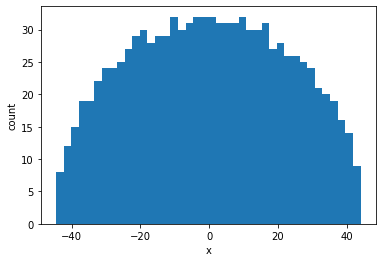

In [64]:
import matplotlib.pyplot as plt 
plt.hist(evals, bins=40);
plt.xlabel('x')
plt.ylabel('count')
#plt.axis('scaled')
plt.show()

This looks suspiciously like a semi-circle, and it turns out that you are observing the famous [semicircle distribution](https://en.wikipedia.org/wiki/Wigner_semicircle_distribution) first [proposed](https://en.wikipedia.org/wiki/Wigner_surmise) by Eugene Wigner to understand energies of heavy atoms.

The above matrices were constructed using normally distributed matrix entries. Does that matter? Lets find out by choosing random zeros and ones instead.

[[ 0.   0.   0.  ...  0.5 -0.5  0.5]
 [ 0.  -1.   1.  ...  0.   0.5  0.5]
 [ 0.   1.   1.  ... -0.5  0.   1. ]
 ...
 [ 0.5  0.  -0.5 ...  1.   0.   0. ]
 [-0.5  0.5  0.  ...  0.   1.  -1. ]
 [ 0.5  0.5  1.  ...  0.  -1.   1. ]]


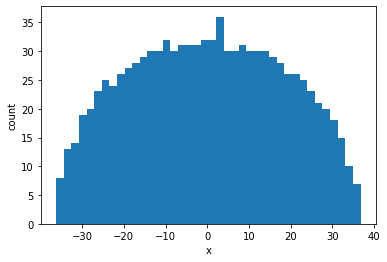

In [65]:
A=np.random.randint(-1,2,size=(1000,1000))
A=(A+A.T)/2
print(A)

evals=np.real(la.eig(A)[0])
#print(evals)

import matplotlib.pyplot as plt 
plt.hist(evals, bins=40);
plt.xlabel('x')
plt.ylabel('count')
#plt.axis('scaled')
plt.show()

This looks fairly much the same. There are good reasons for this. For more, please look at https://en.wikipedia.org/wiki/Random_matrix.

## Conclusion and Outlook

In this lecture we introduced the basics of doing Linear Algebra with Python.